Counts:
 class
good    700
bad     300
Name: count, dtype: int64

Percentages (%):
 class
good    70.0
bad     30.0
Name: proportion, dtype: float64

Missing in target: 0


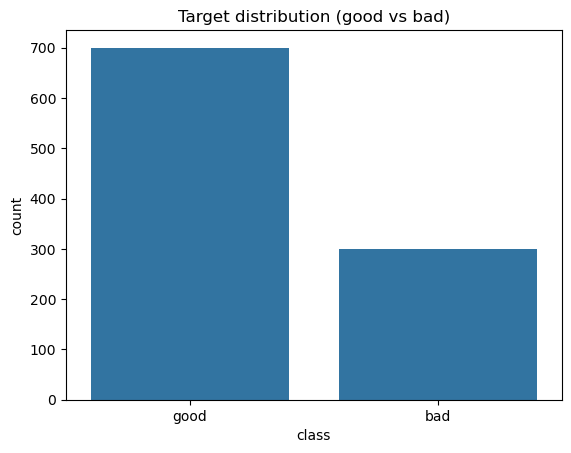

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data\credit_customers (1).csv") 
df.describe()
# 1) Raw counts
counts = df["class"].value_counts(dropna=False)
print("Counts:\n", counts)

# 2) Percentages
pct = df["class"].value_counts(normalize=True) * 100
print("\nPercentages (%):\n", pct.round(2))

# 3) Quick sanity: any missing in target?
missing_target = df["class"].isna().sum()
print(f"\nMissing in target: {missing_target}")

# 4) Plot
sns.countplot(x="class", data=df)
plt.title("Target distribution (good vs bad)")
plt.xlabel("class")
plt.ylabel("count")
plt.show()



Numerical features

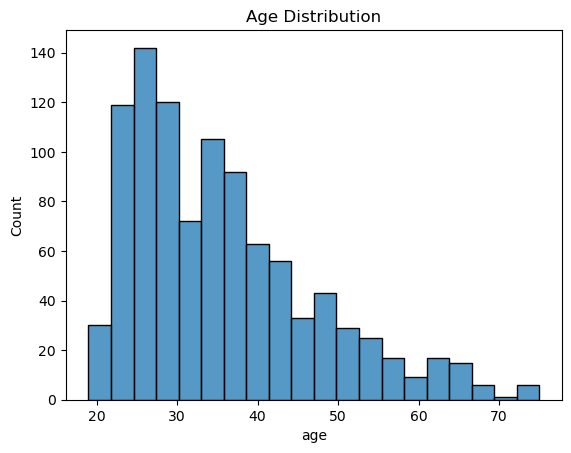

In [18]:
sns.histplot(df['age'], bins=20)
plt.title("Age Distribution")
plt.show()

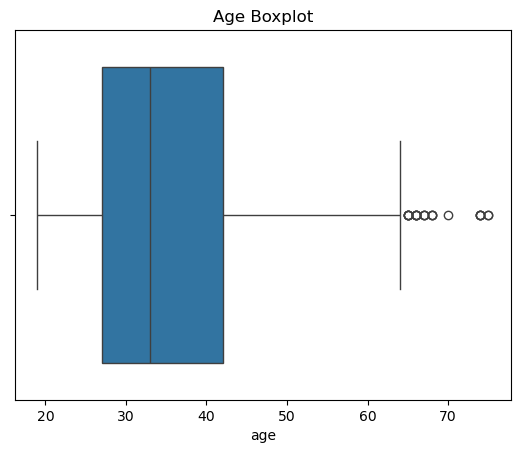

In [19]:
sns.boxplot(x=df["age"])
plt.title("Age Boxplot")
plt.show()


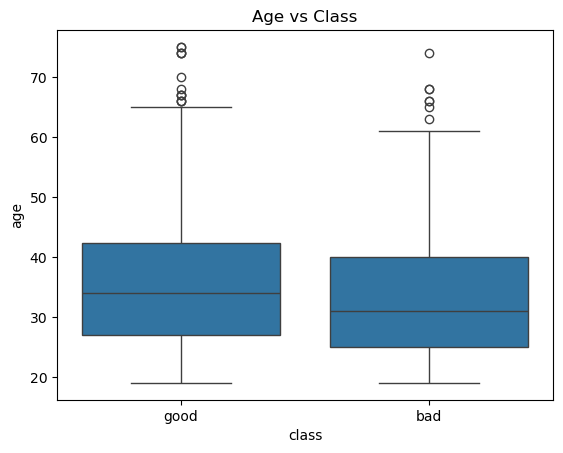

In [20]:
sns.boxplot(x="class", y="age", data=df)
plt.title("Age vs Class")
plt.show()



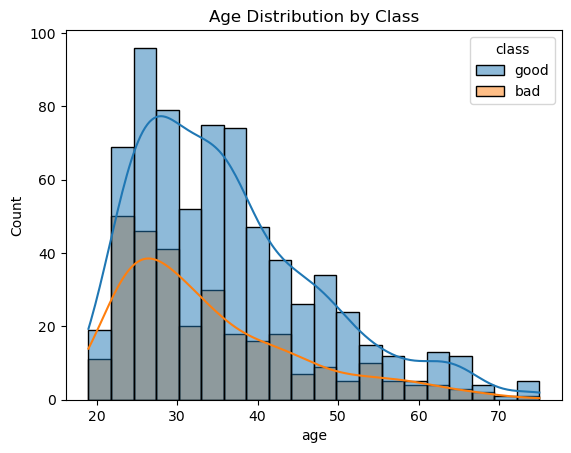

In [21]:
sns.histplot(data=df, x="age", hue="class", bins=20, kde=True)
plt.title("Age Distribution by Class")
plt.show()


Categorical Features

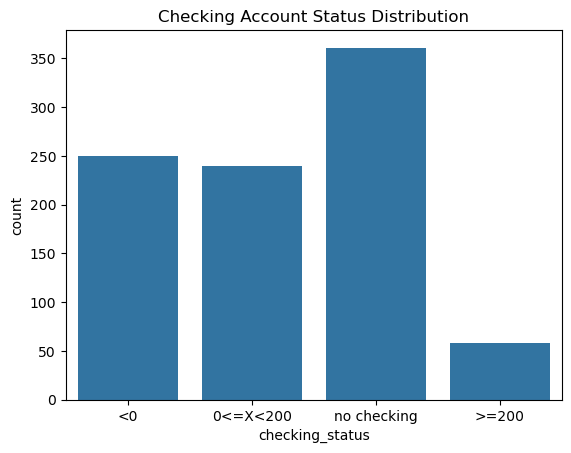

In [22]:
df["checking_status"].value_counts(dropna=False)
pd.crosstab(df["checking_status"], df["class"])

sns.countplot(x="checking_status", data=df)
plt.title("Checking Account Status Distribution")
plt.show()


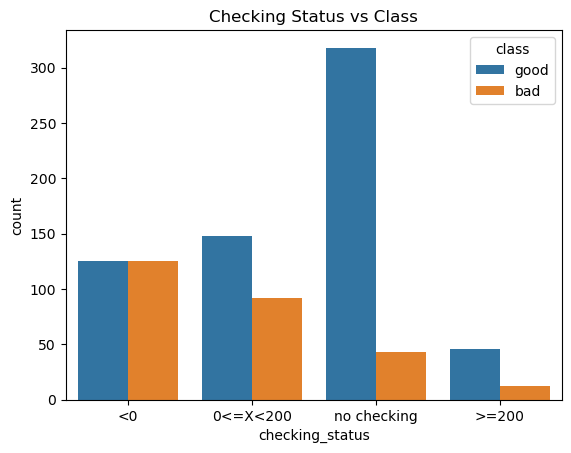

In [23]:
sns.countplot(x="checking_status", hue="class", data=df)
plt.title("Checking Status vs Class")
plt.show()


In [24]:
corr = df.corr(numeric_only=True)
print(corr)


                        duration  credit_amount  installment_commitment  \
duration                1.000000       0.624984                0.074749   
credit_amount           0.624984       1.000000               -0.271316   
installment_commitment  0.074749      -0.271316                1.000000   
residence_since         0.034067       0.028926                0.049302   
age                    -0.036136       0.032716                0.058266   
existing_credits       -0.011284       0.020795                0.021669   
num_dependents         -0.023834       0.017142               -0.071207   

                        residence_since       age  existing_credits  \
duration                       0.034067 -0.036136         -0.011284   
credit_amount                  0.028926  0.032716          0.020795   
installment_commitment         0.049302  0.058266          0.021669   
residence_since                1.000000  0.266419          0.089625   
age                            0.266419  1.0

In [25]:
# Make a copy so we don’t overwrite the original
df_target = df.copy()

# Encode class: good=1, bad=0
df_target["class_num"] = df_target["class"].map({"good": 1, "bad": 0})

# Correlation of all numeric features with class
corr_with_target = df_target.corr(numeric_only=True)["class_num"].sort_values(ascending=False)
print(corr_with_target)


class_num                 1.000000
age                       0.091127
existing_credits          0.045732
num_dependents            0.003015
residence_since          -0.002967
installment_commitment   -0.072404
credit_amount            -0.154739
duration                 -0.214927
Name: class_num, dtype: float64


In [30]:
df.head()
df["class_num"] = df["class"].map({"good": 1, "bad": 0})
corr = df.corr(numeric_only=True)["class_num"].sort_values(ascending=False)
print(corr)


class_num                 1.000000
age                       0.091127
existing_credits          0.045732
num_dependents            0.003015
residence_since          -0.002967
installment_commitment   -0.072404
credit_amount            -0.154739
duration                 -0.214927
Name: class_num, dtype: float64
